In [1]:
#import & dataread

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm,datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
import pandas as pd
from pandas import Series,DataFrame
import itertools
from sklearn import metrics
from matplotlib import pyplot
import random


data = pd.read_csv('/data/wangs/MutaAnalysis/three.data0223/trainingsets/fathmm_cancer/output/fathmm_cancer_training_have_all_score_consistent_tend.tsv', sep='\t')

baseset = DataFrame(data)

col = ['label','ParsSNP','SIFT_score','Polyphen2_HDIV_score','Polyphen2_HVAR_score','LRT_score_new','MutationTaster_score_new','MutationAssessor_score','FATHMM_score','GERP++_RS',\
'PROVEAN_score','VEST3_score','MetaSVM_score','MetaLR_score','M-CAP_score','REVEL_score','MutPred_score','CADD_phred','DANN_score','fathmm-MKL_coding_score','Eigen-raw',\
'Eigen-PC-raw','GenoCanyon_score','SiPhy_29way_logOdds','integrated_fitCons_score','GM12878_fitCons_score','H1-hESC_fitCons_score','HUVEC_fitCons_score',\
'phyloP100way_vertebrate','phyloP20way_mammalian','phastCons100way_vertebrate','phastCons20way_mammalian','CHASMplus','FATHMM_Cancer_score']
#print(len(col))
f_base = baseset.loc[:,col]
print(f_base.head())
f_base.to_csv('vote_fathmm_train_set.csv',index=0)

#a = f_base.row[0]
#print(a)


   label   ParsSNP  SIFT_score  Polyphen2_HDIV_score  Polyphen2_HVAR_score  \
0      1  0.027508       0.989                 0.799                 0.217   
1      0  0.031682       0.937                 0.272                 0.139   
2      1  0.031739       0.956                 0.839                 0.615   
3      1  0.027954       0.995                 0.993                 0.858   
4      0  0.026986       0.979                 0.949                 0.514   

   LRT_score_new  MutationTaster_score_new  MutationAssessor_score  \
0       0.997792                  0.219916                   2.395   
1       1.000000                  0.997552                   1.790   
2       1.000000                  0.999984                   2.950   
3       0.999943                  0.999986                   3.955   
4       1.000000                  0.999998                   2.610   

   FATHMM_score  GERP++_RS         ...           integrated_fitCons_score  \
0         -0.53       4.48       

In [4]:

cutoff_path = '/home/Luhy/database/method_cutoff_table.txt'
f_cutoff = open(cutoff_path,'r')
l = f_cutoff.readline()

l = f_cutoff.readline()
cutoff_dict ={}
while l:
	temp = l.split("	")
	cutoff_dict[temp[0]] = float(temp[1])
	l = f_cutoff.readline()
print("cutoff_dict = ",cutoff_dict)

utoff_dict =  {'FATHMM_score': -1.5, 'integrated_fitCons_score': 0.7, 'GM12878_fitCons_score': 0.7, 'H1.hESC_fitCons_score': 0.7, 'HUVEC_fitCons_score': 0.7, 'LRT_score_new': 0.999, 'MutationAssessor_score': 1.9, 'MutationTaster_score_new': 0.5, 'Polyphen2_HDIV_score': 0.453, 'Polyphen2_HVAR_score': 0.447, 'PROVEAN_score': 2.5, 'SIFT_score': 0.95, 'VEST3_score': 0.5, 'MutPred_score': 0.5, 'GERP.._RS': 2.0, 'phyloP100way_vertebrate': 2.0, 'phyloP20way_mammalian': 2.0, 'phastCons100way_vertebrate': 0.999, 'phastCons20way_mammalian': 0.999, 'SiPhy_29way_logOdds': 12.0, 'CADD_phred': 20.0, 'DANN_score': 0.99, 'Eigen.raw': 0.0, 'Eigen.PC.raw': 0.0, 'fathmm.MKL_coding_score': 0.5, 'GenoCanyon_score': 0.999, 'M.CAP_score': 0.025, 'MetaLR_score': 0.5, 'MetaSVM_score': 0.0, 'REVEL_score': 0.4, 'CHASMplus': 0.279, 'FATHMM_Cancer_score': 0.75, 'CanDrA_Score': 0.15, 'ParsSNP': 0.07, 'CONDEL': 0.522}






cutoff_dict =  {'FATHMM_score': -1.5, 'integrated_fitCons_score': 0.7, 'GM12878_fitCons_score': 0.7, 'H1.hESC_fitCons_score': 0.7, 'HUVEC_fitCons_score': 0.7, 'LRT_score_new': 0.999, 'MutationAssessor_score': 1.9, 'MutationTaster_score_new': 0.5, 'Polyphen2_HDIV_score': 0.453, 'Polyphen2_HVAR_score': 0.447, 'PROVEAN_score': 2.5, 'SIFT_score': 0.95, 'VEST3_score': 0.5, 'MutPred_score': 0.5, 'GERP.._RS': 2.0, 'phyloP100way_vertebrate': 2.0, 'phyloP20way_mammalian': 2.0, 'phastCons100way_vertebrate': 0.999, 'phastCons20way_mammalian': 0.999, 'SiPhy_29way_logOdds': 12.0, 'CADD_phred': 20.0, 'DANN_score': 0.99, 'Eigen.raw': 0.0, 'Eigen.PC.raw': 0.0, 'fathmm.MKL_coding_score': 0.5, 'GenoCanyon_score': 0.999, 'M.CAP_score': 0.025, 'MetaLR_score': 0.5, 'MetaSVM_score': 0.0, 'REVEL_score': 0.4, 'CHASMplus': 0.279, 'FATHMM_Cancer_score': 0.75, 'CanDrA_Score': 0.15, 'ParsSNP': 0.07, 'CONDEL': 0.522}


In [86]:
#################try KNN 
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.joblib import Parallel, delayed
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier 
import pandas as pd
from pandas import Series,DataFrame
score_col = ['SIFT_score','Polyphen2_HDIV_score','Polyphen2_HVAR_score','LRT_score_new','MutationTaster_score_new','MutationAssessor_score','FATHMM_score','GERP++_RS',\
'PROVEAN_score','VEST3_score','MetaSVM_score','MetaLR_score','M-CAP_score','REVEL_score','MutPred_score','CADD_phred','DANN_score','fathmm-MKL_coding_score','Eigen-raw',\
'Eigen-PC-raw','GenoCanyon_score','SiPhy_29way_logOdds','integrated_fitCons_score','GM12878_fitCons_score','H1-hESC_fitCons_score','HUVEC_fitCons_score',\
'phyloP100way_vertebrate','phyloP20way_mammalian','phastCons100way_vertebrate','phastCons20way_mammalian','FATHMM_Cancer_score']
#print(len(score_col))

def knn_work(train_set, test_set,n):
    score_col = ['SIFT_score','Polyphen2_HDIV_score','Polyphen2_HVAR_score','LRT_score_new','MutationTaster_score_new','MutationAssessor_score','FATHMM_score','GERP++_RS',\
    'PROVEAN_score','VEST3_score','MetaSVM_score','MetaLR_score','M-CAP_score','REVEL_score','MutPred_score','CADD_phred','DANN_score','fathmm-MKL_coding_score','Eigen-raw',\
    'Eigen-PC-raw','GenoCanyon_score','SiPhy_29way_logOdds','integrated_fitCons_score','GM12878_fitCons_score','H1-hESC_fitCons_score','HUVEC_fitCons_score',\
    'phyloP100way_vertebrate','phyloP20way_mammalian','phastCons100way_vertebrate','phastCons20way_mammalian']
    best_list = ['MutPred_score','FATHMM_score','MetaLR_score','REVEL_score','MetaSVM_score','M-CAP_score','MutationAssessor_score','SiPhy_29way_logOdds','VEST3_score',\
                 'GERP++_RS','HUVEC_fitCons_score','PROVEAN_score','GM12878_fitCons_score','DANN_score','fathmm-MKL_coding_score']
    
    cnn_best = ['MutPred_score', 'MetaLR_score', 'REVEL_score', 'MetaSVM_score', 'M-CAP_score', \
            'MutationAssessor_score', 'DANN_score', 'HUVEC_fitCons_score', 'GM12878_fitCons_score', \
            'H1-hESC_fitCons_score', 'phyloP20way_mammalian', 'LRT_score_new', 'phastCons20way_mammalian']
    
    
    knn=KNeighborsClassifier(n_neighbors=n,n_jobs=-1)
    rf_best = ['MutPred_score', 'FATHMM_score', 'MetaLR_score', 'REVEL_score', 'MetaSVM_score', 'M-CAP_score', \
           'MutationAssessor_score', 'GERP++_RS', 'DANN_score', 'HUVEC_fitCons_score', 'GM12878_fitCons_score', \
           'H1-hESC_fitCons_score', 'phastCons20way_mammalian', 'GenoCanyon_score', 'phastCons100way_vertebrate']
    knn_799_best =['MutPred_score', 'FATHMM_score', 'MutationAssessor_score', 'VEST3_score', 'Eigen-PC-raw', \
            'H1-hESC_fitCons_score', 'MutationTaster_score_new']

    cnn_best.append('CHASMplus')
    knn_back = ['MutPred_score', 'FATHMM_score', 'M-CAP_score', 'MutationAssessor_score', 'VEST3_score',\
     'GM12878_fitCons_score', 'Eigen-raw', 'H1-hESC_fitCons_score']
    #knn_back.append('CHASMplus')
    t1 = ['MutPred_score', 'MutationAssessor_score', 'integrated_fitCons_score', 'phyloP20way_mammalian', \
     'phastCons20way_mammalian', 'CHASMplus', 'FATHMM_Cancer_score']
    cheat = ['FATHMM_score', 'REVEL_score', 'phyloP100way_vertebrate', 'fathmm-MKL_coding_score',\
             'PROVEAN_score', 'GM12878_fitCons_score', 'H1-hESC_fitCons_score', 'Polyphen2_HVAR_score',\
             'MutationTaster_score_new', 'LRT_score_new', 'phastCons20way_mammalian', 'GenoCanyon_score',\
             'phastCons100way_vertebrate', 'CHASMplus']
    chasm_train =   ['SIFT_score', 'FATHMM_score', 'VEST3_score', 'DANN_score',\
     'SiPhy_29way_logOdds', 'integrated_fitCons_score', 'HUVEC_fitCons_score']
    chasm_70_hit =  ['VEST3_score', 'M-CAP_score', 'integrated_fitCons_score',\
                     'GM12878_fitCons_score', 'H1-hESC_fitCons_score', 'HUVEC_fitCons_score']
    chasm_70_hit_149 =  ['MutationAssessor_score', 'GERP++_RS', 'VEST3_score', 'MetaSVM_score',\
                         'MetaLR_score', 'M-CAP_score', 'CADD_phred', 'integrated_fitCons_score',\
                         'GM12878_fitCons_score', 'H1-hESC_fitCons_score', 'HUVEC_fitCons_score']

    #cnn_best.append('FATHMM_Cancer_score')
    
    train_set_label = train_set['label']
    train_set_X = z_score(train_set[knn_back])[knn_back]
    test_set_label = test_set['label']
    test_set_X = z_score(test_set[knn_back])[knn_back]
    
    knn_X = knn.fit(train_set_X,train_set_label)
    print(knn_X)
    print('begin predict')
    r = knn.predict(test_set_X)
    rr= knn.predict_proba(test_set_X)
    print('predict end')
    knn_score_for_z_score = knn.predict_proba(train_set_X)
    
    knn_result = []
    knn_result_for_z = []
    for pred in r:
        knn_result.append(pred)
    knn_pred = []
    for j in rr:
        knn_pred.append(j[1])
    for k in knn_score_for_z_score:
        knn_result_for_z.append(k[1])
        
    #print(r)
    #print(knn_result)
    FATHMM_Cancer_score = test_set.loc[:,'FATHMM_Cancer_score'] 
    CHASMplus = test_set.loc[:,'CHASMplus']
    #print(CHASMplus.name)
    ParsSNP = test_set.loc[:,'ParsSNP']
    c_result = cutoff(CHASMplus)
    p_result = cutoff(ParsSNP)
    vote_result = []
    for i in range(len(r)):
        if c_result[i] + p_result[i] + knn_result[i] >1:
            vote_result.append(1)
        else:
            vote_result.append(0)
    '''
    print("new_score_acc = ",accuracy_score(test_set_label, knn_result))
    print("chasm+_score_acc = ",accuracy_score(test_set_label, c_result))
    print("ParsSNP_score_acc = ",accuracy_score(test_set_label, p_result))
    print("vote_score_acc = ",accuracy_score(test_set_label, vote_result))
    print("new_score_mcc = ",matthews_corrcoef(test_set_label, knn_result))
    print("chasm+_score_mcc = ",matthews_corrcoef(test_set_label, c_result))
    print("ParsSNP_score_mcc = ",matthews_corrcoef(test_set_label, p_result))
    print("vote_score_mcc = ",matthews_corrcoef(test_set_label, vote_result))
    '''
    #print(type(CHASMplus))
   # print(type(knn_pred))
    knn_pred = pd.Series(knn_pred)
    knn_pred.name = "knn"
    knn_result_for_z = pd.Series(knn_result_for_z)
    knn_result_for_z.name = "knn"

    k_z = z_score_list_debug(knn_pred,knn_result_for_z)
    c_z = z_score_list_debug(CHASMplus,train_set['CHASMplus'] )
    p_z = z_score_list_debug(ParsSNP,train_set['ParsSNP'])
    
    vote_score = []
    #print(k_z)
    #print(k_z)
    #print(p_z)
    for i in range(len(r)):
        #vote_score.append(0.5*k_z[i]+c_z[i]+0.5*p_z[i])
        vote_score.append(k_z[i]+c_z[i]+p_z[i])
    #save_score(CHASMplus,ParsSNP,vote_score,knn_pred)
    vote_score = pd.Series(vote_score)
    vote_score.name = "vote_score"    
    print(type(test_set_label))
    temp_result = pd.concat([CHASMplus,ParsSNP,vote_score,knn_pred,test_set_label], axis=1)
    temp_result.to_csv('combine_cancer_score_from_fathmm.csv',index=0)
    roc(test_set_label,CHASMplus,ParsSNP,vote_score)  
    

    
    
            
                
            
    #print(c_result)
    
    
    #mcc = matthews_corrcoef(test_set_label, r)
    #acc = accuracy_score(test_set_label, r)
    #roc(test_set_label,FATHMM_Cancer_score,CHASMplus,score_pred)

    return 1,1
def cutoff(x):
    score_name = x.name
    cutoff_dict =  {'FATHMM_score': -1.5, 'integrated_fitCons_score': 0.7, 'GM12878_fitCons_score': 0.7, 'H1.hESC_fitCons_score': 0.7, 'HUVEC_fitCons_score': 0.7, 'LRT_score_new': 0.999, \
    'MutationAssessor_score': 1.9, 'MutationTaster_score_new': 0.5, 'Polyphen2_HDIV_score': 0.453, 'Polyphen2_HVAR_score': 0.447, 'PROVEAN_score': 2.5, 'SIFT_score': 0.95, 'VEST3_score': 0.5, \
    'MutPred_score': 0.5, 'GERP.._RS': 2.0, 'phyloP100way_vertebrate': 2.0, 'phyloP20way_mammalian': 2.0, 'phastCons100way_vertebrate': 0.999, 'phastCons20way_mammalian': 0.999, 'SiPhy_29way_logOdds': 12.0, \
    'CADD_phred': 20.0, 'DANN_score': 0.99, 'Eigen.raw': 0.0, 'Eigen.PC.raw': 0.0, 'fathmm.MKL_coding_score': 0.5, 'GenoCanyon_score': 0.999, 'M.CAP_score': 0.025, 'MetaLR_score': 0.5, 'MetaSVM_score': 0.0, 'REVEL_score': 0.4, \
    'CHASMplus': 0.279, 'FATHMM_Cancer_score': 0.75, 'CanDrA_Score': 0.15, 'ParsSNP': 0.07, 'CONDEL': 0.522}
    pred_list = []
    cutoff_temp = cutoff_dict[score_name]
    for i in x:
        if i > cutoff_temp:
            pred_list.append(1)
        else:
            pred_list.append(0)
    return pred_list


def roc(label,score1,score2,score3):
    fpr1, tpr1, _ = roc_curve(label, score1)
    roc_auc1 = auc(fpr1, tpr1)
    fpr2, tpr2, _ = roc_curve(label, score2)
    roc_auc2 = auc(fpr2, tpr2)
    fpr3, tpr3, _ = roc_curve(label, score3)
    roc_auc3 = auc(fpr3, tpr3)
    
    plt.figure()
    
    plt.plot(fpr1, tpr1, color='navy', lw=2, label='CHASMplus ROC curve (area = %0.2f)' % roc_auc1)
    plt.plot(fpr2, tpr2, color='yellow', lw=2, label='ParsSNP ROC curve (area = %0.2f)' % roc_auc2)
    plt.plot(fpr3, tpr3, color='red', lw=2, label='vote score ROC curve (area = %0.2f)' % roc_auc3)
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    '''
    plt.plot(fpr1, tpr1, color='navy', lw=2, label='FATHMM_Cancer_score ROC ' )
    plt.plot(fpr2, tpr2, color='yellow', lw=2, label='CHASMplus')
    plt.plot(fpr3, tpr3, color='red', lw=2, label='new score')
    #plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    print('auc = ',roc_auc3)
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    '''
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.00])
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')
    plt.title('vote_score(simple plus)')
    plt.legend(loc="lower right")
    #plt.show()    
def z_score(X):
    z_list = []
    z_list = pd.Series(z_list)
    for i in range(X.shape[1]):
        a = X.iloc[:, [i]]
        a_mean = a.mean(axis=0)  
        a_std = a.std(axis=0)  
        a1 = (a-a_mean)/a_std
        z_list = pd.concat([z_list,a1],axis=1)
        #print(z_list)
    #z_list = z_list.iloc[:,[1,z_list.shape[1]-1]]
    return z_list
def z_score_list(X):
    z_list = []
    z_list = pd.Series(z_list)
    for i in range(1):
        a = X
        a_mean = a.mean(axis=0)  
        a_std = a.std(axis=0)  
        a1 = (a-a_mean)/a_std
        z_list = pd.concat([z_list,a1],axis=1)
        #print(z_list)
    #z_list = z_list.iloc[:,[1,z_list.shape[1]-1]]
    return z_list
def z_score_list_debug(X,base):
    #print(X.index)
    Y = []
    b = base
    z_list = []
    z_list = pd.Series(z_list)
    b_mean = b.mean(axis=0)
    b_std = b.std(axis=0)
    for index in X.index:
        #print(X[index])
        Y.append((X[index]-b_mean)/b_std)

        #print(z_list)
    #z_list = z_list.iloc[:,[1,z_list.shape[1]-1]]
    Y=  pd.Series(Y)
    print(X.name)

    Y.name = X.name
    #print(Y)
    return Y
    
ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.10)
tr_set1 = pd.read_csv('chasmplus_training_set_real.csv')
tr_set1 = DataFrame(tr_set1)
tr_set2 = pd.read_csv('have_CHASMplus,FATHMMcancer_fathmm_training_set_real.csv')
tr_set2 = DataFrame(tr_set2)
tr_temp = pd.read_csv('temp_chasm_train_set.csv')
tr_temp = DataFrame(tr_temp)
tr_vote = pd.read_csv('vote_fathmm_train_set.csv')
tr_vote = DataFrame(tr_vote)

te_set1 = pd.read_csv('/data/wangs/MutaAnalysis/three.data0223/output/findal/drop.all.training/hpm_fmn_have_all_score_del_chasmplus_fathmmcancer_parssnp_training_set.tsv', sep='\t')
te_set1 = DataFrame(te_set1)
te_set2 = pd.read_csv('/data/wangs/MutaAnalysis/three.data0223/output/findal/drop.all.training/fmd_fmn_have_all_score_del_chasmplus_fathmmcancer_parssnp_training_set.tsv', sep='\t')
te_set2 = DataFrame(te_set2)
te_set3 = pd.read_csv('have_CHASMplus,FATHMMcancer_chasmplus_training_set_real.csv')
te_set3 = DataFrame(te_set3)
te_set4 = pd.read_csv('have_CHASMplus,FATHMMcancer_fathmm_training_set_real.csv')
te_set4 = DataFrame(te_set4)
te_set5 = pd.read_csv('/data/wangs/MutaAnalysis/three.data0223/output/findal/drop.all.training/hpm_exac_have_all_score_del_chasmplus_fathmmcancer_parssnp_training_set.tsv', sep='\t')
te_set5 = DataFrame(te_set5)
'''
te_set6 = pd.read_csv('/data/wangs/MutaAnalysis/three.data0223/output/findal/drop.all.training/hpm_hpmrandom_have_all_score_del_chasmplus_fathmmcancer_parssnp_training_set.tsv', sep='\t')
te_set6 = DataFrame(te_set6)
'''
acc_list = []
#print(te_set2.columns.values)
    #print(t_set.iloc[train_index])
#vote split
ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.10)
for train_index, test_index in ss.split(tr_vote):
    train_set = tr_vote.iloc[train_index]
    test_set = tr_vote.iloc[test_index]
for i in range(1):
    
    n = 799
    print('n_neighbors = ',n)
    
    mcc,acc = knn_work(tr_vote,tr_vote,n)
    acc_list.append(acc)

    
    #print('acc = ',acc)  
    #print('mcc = ',mcc)
cutoff_dict =  {'FATHMM_score': -1.5, 'integrated_fitCons_score': 0.7, 'GM12878_fitCons_score': 0.7, 'H1.hESC_fitCons_score': 0.7, 'HUVEC_fitCons_score': 0.7, 'LRT_score_new': 0.999, 'MutationAssessor_score': 1.9, 'MutationTaster_score_new': 0.5, 'Polyphen2_HDIV_score': 0.453, 'Polyphen2_HVAR_score': 0.447, 'PROVEAN_score': 2.5, 'SIFT_score': 0.95, 'VEST3_score': 0.5, 'MutPred_score': 0.5, 'GERP.._RS': 2.0, 'phyloP100way_vertebrate': 2.0, 'phyloP20way_mammalian': 2.0, 'phastCons100way_vertebrate': 0.999, 'phastCons20way_mammalian': 0.999, 'SiPhy_29way_logOdds': 12.0, 'CADD_phred': 20.0, 'DANN_score': 0.99, 'Eigen.raw': 0.0, 'Eigen.PC.raw': 0.0, 'fathmm.MKL_coding_score': 0.5, 'GenoCanyon_score': 0.999, 'M.CAP_score': 0.025, 'MetaLR_score': 0.5, 'MetaSVM_score': 0.0, 'REVEL_score': 0.4, 'CHASMplus': 0.279, 'FATHMM_Cancer_score': 0.75, 'CanDrA_Score': 0.15, 'ParsSNP': 0.07, 'CONDEL': 0.522}



n_neighbors =  799
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=799, p=2,
           weights='uniform')
begin predict


KeyboardInterrupt: 

c =  0.9274154731895838
p =  0.8466871320114034


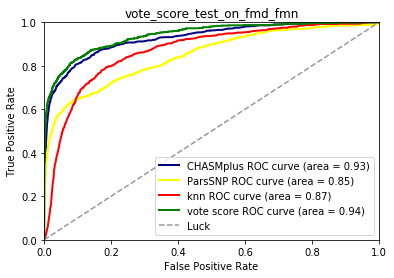

In [6]:
####roc test ####
def roc(label,score1,score2,score3,score4):
    fpr1, tpr1, _ = roc_curve(label, score1)
    roc_auc1 = auc(fpr1, tpr1)
    fpr2, tpr2, _ = roc_curve(label, score2)
    roc_auc2 = auc(fpr2, tpr2)
    fpr3, tpr3, _ = roc_curve(label, score3)
    roc_auc3 = auc(fpr3, tpr3)
    fpr4, tpr4, _ = roc_curve(label, score4)
    roc_auc4 = auc(fpr4, tpr4)    
    plt.figure()
    print('c = ',roc_auc1)
    print('p = ',roc_auc2)
    plt.plot(fpr1, tpr1, color='navy', lw=2, label='CHASMplus ROC curve (area = %0.2f)' % roc_auc1)
    plt.plot(fpr2, tpr2, color='yellow', lw=2, label='ParsSNP ROC curve (area = %0.2f)' % roc_auc2)
    plt.plot(fpr3, tpr3, color='red', lw=2, label='knn ROC curve (area = %0.2f)' % roc_auc3)
    plt.plot(fpr4, tpr4, color='green', lw=2, label='vote score ROC curve (area = %0.2f)' % roc_auc4)
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    '''
    plt.plot(fpr1, tpr1, color='navy', lw=2, label='FATHMM_Cancer_score ROC ' )
    plt.plot(fpr2, tpr2, color='yellow', lw=2, label='CHASMplus')
    plt.plot(fpr3, tpr3, color='red', lw=2, label='new score')
    #plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    print('auc = ',roc_auc3)
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    '''
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.00])
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')
    plt.title('vote_score_test_on_fmd_fmn')
    plt.legend(loc="lower right")
    plt.show()   

#for i in range(2,12):
#print('feature len = ',i)

tar_file = 'combine_cancer_score_from_hpm_exac_debug_11.csv'
roc_df = pd.read_csv(tar_file)
roc_df = DataFrame(roc_df)
label = roc_df['label']
CHASMplus = roc_df['CHASMplus']
ParsSNP = roc_df['ParsSNP']
knn = roc_df['knn']
vote_score = roc_df['vote_score']





roc(label,CHASMplus,ParsSNP,knn,vote_score)


In [5]:
import pandas as pd
from pandas import Series,DataFrame
te_set5 = pd.read_csv('/data/wangs/MutaAnalysis/three.data0223/output/findal/drop.all.training/hpm_exac_have_all_score_del_chasmplus_fathmmcancer_parssnp_training_set.tsv', sep='\t')
te_set5 = DataFrame(te_set5)

te_set6 = pd.read_csv('/data/wangs/MutaAnalysis/three.data0223/output/findal/drop.all.training/hpm_hpmrandom_have_all_score_del_chasmplus_fathmmcancer_parssnp_training_set.tsv', sep='\t')
te_set6 = DataFrame(te_set6)

print(te_set5.shape[0])
print(te_set6.shape[0])

1234779
2363942


In [4]:
####predict hpmrandom the big file
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm,datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
import pandas as pd
from pandas import Series,DataFrame
import itertools
from sklearn import metrics
from matplotlib import pyplot
import random
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.joblib import Parallel, delayed
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier 
import pandas as pd
from pandas import Series,DataFrame

def knn_work(train_set, test_set,n,filename):
    score_col = ['SIFT_score','Polyphen2_HDIV_score','Polyphen2_HVAR_score','LRT_score_new','MutationTaster_score_new','MutationAssessor_score','FATHMM_score','GERP++_RS',\
    'PROVEAN_score','VEST3_score','MetaSVM_score','MetaLR_score','M-CAP_score','REVEL_score','MutPred_score','CADD_phred','DANN_score','fathmm-MKL_coding_score','Eigen-raw',\
    'Eigen-PC-raw','GenoCanyon_score','SiPhy_29way_logOdds','integrated_fitCons_score','GM12878_fitCons_score','H1-hESC_fitCons_score','HUVEC_fitCons_score',\
    'phyloP100way_vertebrate','phyloP20way_mammalian','phastCons100way_vertebrate','phastCons20way_mammalian']
    best_list = ['MutPred_score','FATHMM_score','MetaLR_score','REVEL_score','MetaSVM_score','M-CAP_score','MutationAssessor_score','SiPhy_29way_logOdds','VEST3_score',\
                 'GERP++_RS','HUVEC_fitCons_score','PROVEAN_score','GM12878_fitCons_score','DANN_score','fathmm-MKL_coding_score']
    
    cnn_best = ['MutPred_score', 'MetaLR_score', 'REVEL_score', 'MetaSVM_score', 'M-CAP_score', \
            'MutationAssessor_score', 'DANN_score', 'HUVEC_fitCons_score', 'GM12878_fitCons_score', \
            'H1-hESC_fitCons_score', 'phyloP20way_mammalian', 'LRT_score_new', 'phastCons20way_mammalian']
    
    
    knn=KNeighborsClassifier(n_neighbors=n,n_jobs=-1)
    rf_best = ['MutPred_score', 'FATHMM_score', 'MetaLR_score', 'REVEL_score', 'MetaSVM_score', 'M-CAP_score', \
           'MutationAssessor_score', 'GERP++_RS', 'DANN_score', 'HUVEC_fitCons_score', 'GM12878_fitCons_score', \
           'H1-hESC_fitCons_score', 'phastCons20way_mammalian', 'GenoCanyon_score', 'phastCons100way_vertebrate']
    knn_799_best =['MutPred_score', 'FATHMM_score', 'MutationAssessor_score', 'VEST3_score', 'Eigen-PC-raw', \
            'H1-hESC_fitCons_score', 'MutationTaster_score_new']

    cnn_best.append('CHASMplus')
    knn_back = ['MutPred_score', 'FATHMM_score', 'M-CAP_score', 'MutationAssessor_score', 'VEST3_score',\
     'GM12878_fitCons_score', 'Eigen-raw', 'H1-hESC_fitCons_score']
    #knn_back.append('CHASMplus')
    t1 = ['MutPred_score', 'MutationAssessor_score', 'integrated_fitCons_score', 'phyloP20way_mammalian', \
     'phastCons20way_mammalian', 'CHASMplus', 'FATHMM_Cancer_score']
    cheat = ['FATHMM_score', 'REVEL_score', 'phyloP100way_vertebrate', 'fathmm-MKL_coding_score',\
             'PROVEAN_score', 'GM12878_fitCons_score', 'H1-hESC_fitCons_score', 'Polyphen2_HVAR_score',\
             'MutationTaster_score_new', 'LRT_score_new', 'phastCons20way_mammalian', 'GenoCanyon_score',\
             'phastCons100way_vertebrate', 'CHASMplus']
    chasm_train =   ['SIFT_score', 'FATHMM_score', 'VEST3_score', 'DANN_score',\
     'SiPhy_29way_logOdds', 'integrated_fitCons_score', 'HUVEC_fitCons_score']
    chasm_70_hit =  ['VEST3_score', 'M-CAP_score', 'integrated_fitCons_score',\
                     'GM12878_fitCons_score', 'H1-hESC_fitCons_score', 'HUVEC_fitCons_score']
    chasm_70_hit_149 =  ['MutationAssessor_score', 'GERP++_RS', 'VEST3_score', 'MetaSVM_score',\
                         'MetaLR_score', 'M-CAP_score', 'CADD_phred', 'integrated_fitCons_score',\
                         'GM12878_fitCons_score', 'H1-hESC_fitCons_score', 'HUVEC_fitCons_score']

    #cnn_best.append('FATHMM_Cancer_score')
    
    train_set_label = train_set['label']
    train_set_X = z_score(train_set[knn_back])[knn_back]
    test_set_label = test_set['label']
    test_set_X = z_score(test_set[knn_back])[knn_back]
    
    knn_X = knn.fit(train_set_X,train_set_label)
    print(knn_X)
    print('begin predict')
    r = knn.predict(test_set_X)
    rr= knn.predict_proba(test_set_X)
    print('predict end')

    
    knn_result = []
    knn_pred = []
    for j in rr:
        knn_pred.append(j[1])
    #print(r)
    #print(knn_result)
    FATHMM_Cancer_score = test_set.loc[:,'FATHMM_Cancer_score'] 
    CHASMplus = test_set.loc[:,'CHASMplus']
    #print(CHASMplus.name)
    ParsSNP = test_set.loc[:,'ParsSNP']
    c_pred = []
    for index in CHASMplus.index:
        c_pred.append(CHASMplus[index])
    c_pred = pd.Series(c_pred)
    c_pred.name = "CHASMplus"
    p_pred = []
    for index in ParsSNP.index:
        p_pred.append(ParsSNP[index])
    p_pred = pd.Series(p_pred)
    p_pred.name = "ParsSNP"
    label_trans = []
    for index in test_set_label.index:
        label_trans.append(test_set_label[index])
    label_trans = pd.Series(label_trans)
    label_trans.name = "label"
    vote_result = []
    
    '''
    print("new_score_acc = ",accuracy_score(test_set_label, knn_result))
    print("chasm+_score_acc = ",accuracy_score(test_set_label, c_result))
    print("ParsSNP_score_acc = ",accuracy_score(test_set_label, p_result))
    print("vote_score_acc = ",accuracy_score(test_set_label, vote_result))
    print("new_score_mcc = ",matthews_corrcoef(test_set_label, knn_result))
    print("chasm+_score_mcc = ",matthews_corrcoef(test_set_label, c_result))
    print("ParsSNP_score_mcc = ",matthews_corrcoef(test_set_label, p_result))
    print("vote_score_mcc = ",matthews_corrcoef(test_set_label, vote_result))
    '''
    knn_pred = pd.Series(knn_pred)
    knn_pred.name = "knn"
    
    k_z = z_score_list(knn_pred)['knn']
    c_z = z_score_list(c_pred)['CHASMplus']
    p_z = z_score_list(p_pred)['ParsSNP']
    vote_score = []
    #print(k_z)
    for i in range(len(r)):
        #vote_score.append(0.5*k_z[i]+c_z[i]+0.5*p_z[i])
        vote_score.append(k_z[i]+c_z[i]+p_z[i])
    #save_score(CHASMplus,ParsSNP,vote_score,knn_pred)
    vote_score = pd.Series(vote_score)
    vote_score.name = "vote_score"    

    temp_result = pd.concat([c_pred,p_pred,vote_score,knn_pred,label_trans], axis=1)
    temp_result.to_csv(filename,index=0)


    
    
            
                
            
    #print(c_result)
    
    
    #mcc = matthews_corrcoef(test_set_label, r)
    #acc = accuracy_score(test_set_label, r)
    #roc(test_set_label,FATHMM_Cancer_score,CHASMplus,score_pred)

    return 1,1
def cutoff(x):
    score_name = x.name
    cutoff_dict =  {'FATHMM_score': -1.5, 'integrated_fitCons_score': 0.7, 'GM12878_fitCons_score': 0.7, 'H1.hESC_fitCons_score': 0.7, 'HUVEC_fitCons_score': 0.7, 'LRT_score_new': 0.999, \
    'MutationAssessor_score': 1.9, 'MutationTaster_score_new': 0.5, 'Polyphen2_HDIV_score': 0.453, 'Polyphen2_HVAR_score': 0.447, 'PROVEAN_score': 2.5, 'SIFT_score': 0.95, 'VEST3_score': 0.5, \
    'MutPred_score': 0.5, 'GERP.._RS': 2.0, 'phyloP100way_vertebrate': 2.0, 'phyloP20way_mammalian': 2.0, 'phastCons100way_vertebrate': 0.999, 'phastCons20way_mammalian': 0.999, 'SiPhy_29way_logOdds': 12.0, \
    'CADD_phred': 20.0, 'DANN_score': 0.99, 'Eigen.raw': 0.0, 'Eigen.PC.raw': 0.0, 'fathmm.MKL_coding_score': 0.5, 'GenoCanyon_score': 0.999, 'M.CAP_score': 0.025, 'MetaLR_score': 0.5, 'MetaSVM_score': 0.0, 'REVEL_score': 0.4, \
    'CHASMplus': 0.279, 'FATHMM_Cancer_score': 0.75, 'CanDrA_Score': 0.15, 'ParsSNP': 0.07, 'CONDEL': 0.522}
    pred_list = []
    cutoff_temp = cutoff_dict[score_name]
    for i in x:
        if i > cutoff_temp:
            pred_list.append(1)
        else:
            pred_list.append(0)
    return pred_list


def roc(label,score1,score2,score3):
    fpr1, tpr1, _ = roc_curve(label, score1)
    roc_auc1 = auc(fpr1, tpr1)
    fpr2, tpr2, _ = roc_curve(label, score2)
    roc_auc2 = auc(fpr2, tpr2)
    fpr3, tpr3, _ = roc_curve(label, score3)
    roc_auc3 = auc(fpr3, tpr3)
    
    plt.figure()
    
    plt.plot(fpr1, tpr1, color='navy', lw=2, label='CHASMplus ROC curve (area = %0.2f)' % roc_auc1)
    plt.plot(fpr2, tpr2, color='yellow', lw=2, label='ParsSNP ROC curve (area = %0.2f)' % roc_auc2)
    plt.plot(fpr3, tpr3, color='red', lw=2, label='vote score ROC curve (area = %0.2f)' % roc_auc3)
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    '''
    plt.plot(fpr1, tpr1, color='navy', lw=2, label='FATHMM_Cancer_score ROC ' )
    plt.plot(fpr2, tpr2, color='yellow', lw=2, label='CHASMplus')
    plt.plot(fpr3, tpr3, color='red', lw=2, label='new score')
    #plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    print('auc = ',roc_auc3)
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    '''
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.00])
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')
    plt.title('vote_score(simple plus)')
    plt.legend(loc="lower right")
    #plt.show()    
def z_score(X):
    z_list = []
    z_list = pd.Series(z_list)
    for i in range(X.shape[1]):
        a = X.iloc[:, [i]]
        a_mean = a.mean(axis=0)  
        a_std = a.std(axis=0)  
        a1 = (a-a_mean)/a_std
        z_list = pd.concat([z_list,a1],axis=1)
        #print(z_list)
    #z_list = z_list.iloc[:,[1,z_list.shape[1]-1]]
    return z_list
def z_score_list(X):
    z_list = []
    z_list = pd.Series(z_list)
    for i in range(1):
        a = X
        a_mean = a.mean(axis=0)  
        a_std = a.std(axis=0)  
        a1 = (a-a_mean)/a_std
        z_list = pd.concat([z_list,a1],axis=1)
        #print(z_list)
    #z_list = z_list.iloc[:,[1,z_list.shape[1]-1]]
    return z_list
tr_vote = pd.read_csv('vote_fathmm_train_set.csv')
tr_vote = DataFrame(tr_vote)

te_set6 = pd.read_csv('/data/wangs/MutaAnalysis/three.data0223/output/findal/drop.all.training/hpm_hpmrandom_have_all_score_del_chasmplus_fathmmcancer_parssnp_training_set.tsv', sep='\t')
te_set6 = DataFrame(te_set6)
tr_set2 = pd.read_csv('have_CHASMplus,FATHMMcancer_fathmm_training_set_real.csv')
tr_set2 = DataFrame(tr_set2)

n = 799
line = 2363942
part_start_list = []
part_end_list = []

for j in range(10):
    part_start_list.append(j*236394)
for j in range(9):
    part_end_list.append((j+1)*236394-1)
part_end_list.append(2363942)   
print(part_start_list)
print(part_end_list)
print('n_neighbors = ',n)
for i in range(10):
    filename =  "combine_cancer_score_from_hpm_hpmrandom_real_part_"+str(i)+"_debug.csv"
    
    mcc,acc = knn_work(tr_vote, te_set6[part_start_list[i]:part_end_list[i]],n,filename)

[0, 236394, 472788, 709182, 945576, 1181970, 1418364, 1654758, 1891152, 2127546]
[236393, 472787, 709181, 945575, 1181969, 1418363, 1654757, 1891151, 2127545, 2363942]
n_neighbors =  799
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=799, p=2,
           weights='uniform')
begin predict
predict end
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=799, p=2,
           weights='uniform')
begin predict
predict end
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=799, p=2,
           weights='uniform')
begin predict
predict end
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=799, p=2,
           weights='uniform')
begin predict
predict end
KNeighborsClassifier(algorithm='auto', le

In [10]:
i= 0

file = "combine_cancer_score_from_hpm_hpmrandom_real_part_"+str(i)+"_debug.csv"
combine_file = pd.read_csv(file)
combine_file = DataFrame(combine_file)
for i in range(9):
    file = "combine_cancer_score_from_hpm_hpmrandom_real_part_"+str(i+1)+"_debug.csv"
    file_temp = pd.read_csv(file)
    file_temp  = DataFrame(file_temp)
    combine_file = pd.concat([combine_file,file_temp],ignore_index=True) 
combine_file.to_csv("/data/wangs/MutaAnalysis/three.data0223/output/findal/combine_cancer_score_from_hpm_hpmrandom_debug.csv",index=0)   

PermissionError: [Errno 13] Permission denied: '/data/wangs/MutaAnalysis/three.data0223/output/findal/combine_cancer_score_from_hpm_hpmrandom_debug.csv'

85.13942856672884 -3.3675985032419087


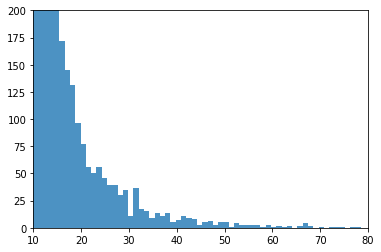

/home/Luhy/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


threshold =  -10
0.0 0.0009540168726549447 1.0 1.0
threshold =  -9
0.0 0.0009540168726549447 1.0 1.0
threshold =  -8
0.0 0.0009540168726549447 1.0 1.0
threshold =  -7
0.0 0.0009540168726549447 1.0 1.0
threshold =  -6
0.0 0.0009540168726549447 1.0 1.0
threshold =  -5
0.0 0.0009540168726549447 1.0 1.0
threshold =  -4
0.0 0.0009540168726549447 1.0 1.0
threshold =  -3
0.0010403758143677669 0.0020862032801011354 0.9988667324361767 1.0
threshold =  -2
0.01004427706012853 0.09803535693431781 0.902825143624235 0.9991511035653651
threshold =  -1
0.02129973664371785 0.3287397987818063 0.671897153131361 0.9957555178268251
threshold =  0
0.03564949030715706 0.5897711250353302 0.41060034808661794 0.9787775891341256
threshold =  1
0.05352632891762256 0.7758983591395707 0.22426619303972678 0.9482173174872666
threshold =  2
0.07292465828366793 0.8813496180288133 0.1186534381862531 0.8845500848896435
threshold =  3
0.09379880035055393 0.9373094294606565 0.06256155758628601 0.8022071307300509
threshold 

In [48]:
#cut off
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
def cutoff(x,t):
    score_name = x.name
    cutoff_dict =  {'FATHMM_score': -1.5, 'integrated_fitCons_score': 0.7, 'GM12878_fitCons_score': 0.7, 'H1.hESC_fitCons_score': 0.7, 'HUVEC_fitCons_score': 0.7, 'LRT_score_new': 0.999, \
    'MutationAssessor_score': 1.9, 'MutationTaster_score_new': 0.5, 'Polyphen2_HDIV_score': 0.453, 'Polyphen2_HVAR_score': 0.447, 'PROVEAN_score': 2.5, 'SIFT_score': 0.95, 'VEST3_score': 0.5, \
    'MutPred_score': 0.5, 'GERP.._RS': 2.0, 'phyloP100way_vertebrate': 2.0, 'phyloP20way_mammalian': 2.0, 'phastCons100way_vertebrate': 0.999, 'phastCons20way_mammalian': 0.999, 'SiPhy_29way_logOdds': 12.0, \
    'CADD_phred': 20.0, 'DANN_score': 0.99, 'Eigen.raw': 0.0, 'Eigen.PC.raw': 0.0, 'fathmm.MKL_coding_score': 0.5, 'GenoCanyon_score': 0.999, 'M.CAP_score': 0.025, 'MetaLR_score': 0.5, 'MetaSVM_score': 0.0, 'REVEL_score': 0.4, \
    'CHASMplus': 0.279, 'FATHMM_Cancer_score': 0.75, 'CanDrA_Score': 0.15, 'ParsSNP': 0.07, 'CONDEL': 0.522}
    pred_list = []
    cutoff_temp = t
    for i in x:
        if i > cutoff_temp:
            pred_list.append(1)
        else:
            pred_list.append(0)
    return pred_list
tar_file = 'combine_cancer_score_from_hpm_exac.csv'
roc_df = pd.read_csv(tar_file)
roc_df = DataFrame(roc_df)
label = roc_df['label']

CHASMplus = roc_df['CHASMplus']
ParsSNP = roc_df['ParsSNP']
knn = roc_df['knn']


vote_score = roc_df['vote_score']

vote_min = vote_score.min()
vote_max = vote_score.max()
print(vote_max,vote_min)
plt.hist(vote_score,bins=80, histtype="stepfilled", alpha=.8)
plt.xlim([10, 80])
plt.ylim([0, 200])
plt.show()
for threshold in range(-10,20):
    pred_list = cutoff(vote_score,threshold)
    mcc = matthews_corrcoef(label, pred_list)
    acc = accuracy_score(label, pred_list)
    fpr,tpr,_ = roc_curve(label, pred_list)
    print("threshold = ",threshold)
    print(mcc,acc,fpr[1],tpr[1])
    
    
    
    



[ 1.57913801  0.06765174  1.39450519 -0.62002191 -2.03460846 -0.5503025
 -0.85946607  0.83092534  1.58248533  0.58564674 -0.79540964  0.48251849
  0.1441508   1.72968537 -0.68859429 -0.6826447  -1.29104532  0.68038218
  2.66423206 -1.18670407 -1.3449015   0.5449043   1.07616293  1.70471136
  1.34069972 -2.74425868  0.21344666  0.11462631 -0.1261859   1.17960121
 -0.16333328 -1.72905613 -0.91534696  0.18500557 -0.67950043  1.23810395
 -0.62174799  0.79325462 -1.76740937  0.17480151  1.0473973   0.55083653
 -0.82066805  0.88102486 -0.32803088 -1.35442604 -0.03315456  0.16255822
  0.66954661  1.08126214 -0.06396049 -0.20561356  1.4056924   0.02976849
 -0.81100097 -0.53877091 -0.3613876  -1.60982243  0.02098799  0.56083138
  0.01513032  0.19672287 -0.34449519 -0.10034798 -0.84311533  0.01322664
  0.03798557 -1.43081703  0.45290313  1.90948381  1.44980445  0.51754159
 -1.51714141 -0.01932601 -1.27324212]


(array([ 1.,  3.,  8., 11., 10., 17., 10., 11.,  3.,  1.]),
 array([-2.74425868, -2.20340961, -1.66256053, -1.12171146, -0.58086238,
        -0.04001331,  0.50083577,  1.04168484,  1.58253391,  2.12338299,
         2.66423206]),
 <a list of 10 Patch objects>)

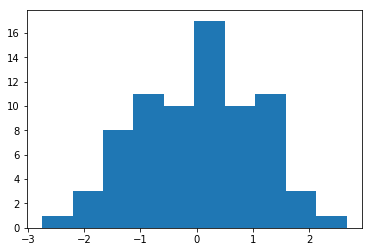

In [26]:
from numpy.random import randn
data = randn(75)
print(data)
plt.hist(data)
tips = sns.load_dataset('tips')
sns.barplot(x = 'day', y = 'total_bill', hue = 'sex', data = tips,
            palette = 'Blues', edgecolor = 'w')
tips.groupby(['day','sex']).mean()
sns.xlit()
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)



16.276029093588928 -2.829149346263178


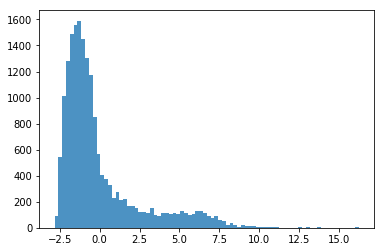

threshold =  0.0
0.7567657130233072 0.0918861347792409 0.4442015942401646 0.5054861096077543
threshold =  0.01
0.757373246437645 0.09043377226955851 0.4447158652609925 0.5070482682691708
threshold =  0.02
0.7578703192311941 0.08898140975987612 0.44548727179223446 0.5083939424717591
threshold =  0.03
0.7578150889207997 0.08791634391944225 0.4470300848547184 0.5085381504061257
threshold =  0.04
0.7575941676792224 0.0873353989155693 0.4483157624067884 0.5082339949627591
threshold =  0.05
0.7574284767480394 0.08694810224632066 0.44921573669323733 0.5079950829484909
threshold =  0.06
0.757373246437645 0.08597986057319906 0.4506299820005143 0.5081254319144551
threshold =  0.07
0.7577046283000111 0.08472114639814099 0.45152995628696324 0.5091138496734268
threshold =  0.08
0.7569866342648846 0.08414020139426803 0.4539727436358961 0.5078179305317903
threshold =  0.09
0.7567657130233072 0.0837529047250194 0.45500128567755205 0.5074743593322876
threshold =  0.1
0.7564895614713355 0.08346243222308

threshold =  0.87
0.7520159063293935 0.033694810224632055 0.5325276420673695 0.5183240791422783
threshold =  0.88
0.752236827570971 0.03292021688613478 0.5330419130881975 0.519197442136644
threshold =  0.89
0.7515740638462388 0.03282339271882262 0.5347132939058884 0.5179715839862985
threshold =  0.9
0.7514636032254501 0.03272656855151046 0.5350989971715094 0.5178141497580945
threshold =  0.91
0.7505799182591406 0.0326297443841983 0.5372846490100283 0.5161602102104897
threshold =  0.92
0.7504694576383519 0.03243609604957398 0.5377989200308563 0.5160597456993952
threshold =  0.93
0.7502485363967746 0.03224244771494966 0.5385703265620982 0.5157458181788258
threshold =  0.94
0.7499171545344084 0.0321456235476375 0.5394703008485472 0.5151612525787954
threshold =  0.95
0.7499723848448028 0.031661502711076706 0.5399845718693752 0.5155548209887619
threshold =  0.96
0.7498066939136198 0.03127420604182807 0.540884546155824 0.5154649776316633
threshold =  0.97
0.7500276151551972 0.030499612703330

threshold =  1.73
0.7297580912404728 0.012587141750580955 0.6123682180509129 0.49004324943451766
threshold =  1.74
0.7292057881365294 0.012587141750580955 0.6136538956029828 0.48897822757882065
threshold =  1.75
0.7289296365845576 0.012587141750580955 0.6142967343790178 0.48844539180772656
threshold =  1.76
0.7287087153429802 0.012587141750580955 0.6148110053998457 0.4880189663199982
threshold =  1.77
0.7286534850325859 0.012296669248644476 0.6153252764206737 0.4881587985538207
threshold =  1.78
0.7282116425494312 0.012296669248644476 0.6163538184623296 0.4873059355937331
threshold =  1.79
0.727880260687065 0.012296669248644476 0.6171252249935716 0.4866659183777941
threshold =  1.8
0.727548878824699 0.012199845081332317 0.6180251992800205 0.48610836687082176
threshold =  1.81
0.727217496962333 0.012006196746707998 0.6190537413216766 0.4856339912855756
threshold =  1.82
0.7263338119960234 0.011812548412083679 0.6213679609154024 0.4840922388161554
threshold =  1.83
0.7261128907544461 0.0

In [71]:
#select threshold on fathmm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
def cutoff(x,t):
    score_name = x.name
    cutoff_dict =  {'FATHMM_score': -1.5, 'integrated_fitCons_score': 0.7, 'GM12878_fitCons_score': 0.7, 'H1.hESC_fitCons_score': 0.7, 'HUVEC_fitCons_score': 0.7, 'LRT_score_new': 0.999, \
    'MutationAssessor_score': 1.9, 'MutationTaster_score_new': 0.5, 'Polyphen2_HDIV_score': 0.453, 'Polyphen2_HVAR_score': 0.447, 'PROVEAN_score': 2.5, 'SIFT_score': 0.95, 'VEST3_score': 0.5, \
    'MutPred_score': 0.5, 'GERP.._RS': 2.0, 'phyloP100way_vertebrate': 2.0, 'phyloP20way_mammalian': 2.0, 'phastCons100way_vertebrate': 0.999, 'phastCons20way_mammalian': 0.999, 'SiPhy_29way_logOdds': 12.0, \
    'CADD_phred': 20.0, 'DANN_score': 0.99, 'Eigen.raw': 0.0, 'Eigen.PC.raw': 0.0, 'fathmm.MKL_coding_score': 0.5, 'GenoCanyon_score': 0.999, 'M.CAP_score': 0.025, 'MetaLR_score': 0.5, 'MetaSVM_score': 0.0, 'REVEL_score': 0.4, \
    'CHASMplus': 0.279, 'FATHMM_Cancer_score': 0.75, 'CanDrA_Score': 0.15, 'ParsSNP': 0.07, 'CONDEL': 0.522}
    pred_list = []
    cutoff_temp = t
    for i in x:
        if i > cutoff_temp:
            pred_list.append(1)
        else:
            pred_list.append(0)
    return pred_list
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)
#tar_file = 'combine_cancer_score_from_fathmm.csv'
tar_file = 'combine_cancer_score_from_fathmm.csv'
roc_df = pd.read_csv(tar_file)
roc_df = DataFrame(roc_df)
label = roc_df['label']

CHASMplus = roc_df['CHASMplus']
ParsSNP = roc_df['ParsSNP']
knn = roc_df['knn']


vote_score = roc_df['vote_score']

vote_min = vote_score.min()
vote_max = vote_score.max()
print(vote_max,vote_min)
plt.hist(vote_score,bins=80, histtype="stepfilled", alpha=.8)
#plt.xlim([0, 80])
#plt.ylim([0, 200])
plt.show()
#print(label)
th_list = []
acc_list = []
fpr_list = []
fnr_list = []
mcc_list = []
for threshold in range(0,200):
    threshold = threshold/100
    pred_list = cutoff(vote_score,threshold)
    
    mcc = matthews_corrcoef(label, pred_list)
    acc = accuracy_score(label, pred_list)
    TP, FP, TN, FN = perf_measure(label, pred_list)
    specificity = TN/(TN+FP)
    sensitivity = TP/(TP+FN)
    fpr = 1 - specificity
    fnr = 1- sensitivity
    print("threshold = ",threshold)
    print(acc,fpr ,fnr,mcc)
    th_list.append(threshold)
    acc_list.append(acc)
    mcc_list.append(mcc)
    fpr_list.append(fpr)
    fnr_list.append(fnr)
    
dict_temp = {"threshold":th_list,'acc':acc_list,'mcc':mcc_list,'fpr':fpr_list,'fnr':fnr_list}

d2 = DataFrame(dict_temp)
d2.to_csv("threshold_select_on_fathmm_vote_score_debug_2.csv",index=0)


[['VEST3_score', 'MutPred_score', 'GERP++_RS', 'FATHMM_score']]
n_neighbors =  799
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=799, p=2,
           weights='uniform')
begin predict
predict end
knn
knn 0.43394219854238814 0.1987524740194231
CHASMplus
CHASMplus 0.1790384955263446 0.23267798497731246
ParsSNP
ParsSNP 0.05276873860520019 0.062045654519142276
<class 'pandas.core.series.Series'>


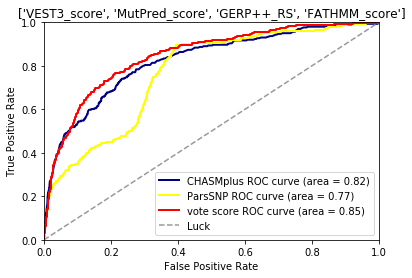

In [8]:
#################try KNN 
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.joblib import Parallel, delayed
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier 
import pandas as pd
from pandas import Series,DataFrame
from sklearn.externals import joblib

score_col = ['SIFT_score','Polyphen2_HDIV_score','Polyphen2_HVAR_score','LRT_score_new','MutationTaster_score_new','MutationAssessor_score','FATHMM_score','GERP++_RS',\
'PROVEAN_score','VEST3_score','MetaSVM_score','MetaLR_score','M-CAP_score','REVEL_score','MutPred_score','CADD_phred','DANN_score','fathmm-MKL_coding_score','Eigen-raw',\
'Eigen-PC-raw','GenoCanyon_score','SiPhy_29way_logOdds','integrated_fitCons_score','GM12878_fitCons_score','H1-hESC_fitCons_score','HUVEC_fitCons_score',\
'phyloP100way_vertebrate','phyloP20way_mammalian','phastCons100way_vertebrate','phastCons20way_mammalian','FATHMM_Cancer_score']
#print(len(score_col))

def knn_work(train_set, test_set,n,imp_feature):
    score_col = ['SIFT_score','Polyphen2_HDIV_score','Polyphen2_HVAR_score','LRT_score_new','MutationTaster_score_new','MutationAssessor_score','FATHMM_score','GERP++_RS',\
    'PROVEAN_score','VEST3_score','MetaSVM_score','MetaLR_score','M-CAP_score','REVEL_score','MutPred_score','CADD_phred','DANN_score','fathmm-MKL_coding_score','Eigen-raw',\
    'Eigen-PC-raw','GenoCanyon_score','SiPhy_29way_logOdds','integrated_fitCons_score','GM12878_fitCons_score','H1-hESC_fitCons_score','HUVEC_fitCons_score',\
    'phyloP100way_vertebrate','phyloP20way_mammalian','phastCons100way_vertebrate','phastCons20way_mammalian']
    best_list = ['MutPred_score','FATHMM_score','MetaLR_score','REVEL_score','MetaSVM_score','M-CAP_score','MutationAssessor_score','SiPhy_29way_logOdds','VEST3_score',\
                 'GERP++_RS','HUVEC_fitCons_score','PROVEAN_score','GM12878_fitCons_score','DANN_score','fathmm-MKL_coding_score']
    
    cnn_best = ['MutPred_score', 'MetaLR_score', 'REVEL_score', 'MetaSVM_score', 'M-CAP_score', \
            'MutationAssessor_score', 'DANN_score', 'HUVEC_fitCons_score', 'GM12878_fitCons_score', \
            'H1-hESC_fitCons_score', 'phyloP20way_mammalian', 'LRT_score_new', 'phastCons20way_mammalian']
    
    
    knn=KNeighborsClassifier(n_neighbors=n,n_jobs=-1)
    rf_best = ['MutPred_score', 'FATHMM_score', 'MetaLR_score', 'REVEL_score', 'MetaSVM_score', 'M-CAP_score', \
           'MutationAssessor_score', 'GERP++_RS', 'DANN_score', 'HUVEC_fitCons_score', 'GM12878_fitCons_score', \
           'H1-hESC_fitCons_score', 'phastCons20way_mammalian', 'GenoCanyon_score', 'phastCons100way_vertebrate']
    knn_799_best =['MutPred_score', 'FATHMM_score', 'MutationAssessor_score', 'VEST3_score', 'Eigen-PC-raw', \
            'H1-hESC_fitCons_score', 'MutationTaster_score_new']

    cnn_best.append('CHASMplus')
    knn_back = ['MutPred_score', 'FATHMM_score', 'M-CAP_score', 'MutationAssessor_score', 'VEST3_score',\
     'GM12878_fitCons_score', 'Eigen-raw', 'H1-hESC_fitCons_score']
    #knn_back.append('CHASMplus')
    t1 = ['MutPred_score', 'MutationAssessor_score', 'integrated_fitCons_score', 'phyloP20way_mammalian', \
     'phastCons20way_mammalian', 'CHASMplus', 'FATHMM_Cancer_score']
    cheat = ['FATHMM_score', 'REVEL_score', 'phyloP100way_vertebrate', 'fathmm-MKL_coding_score',\
             'PROVEAN_score', 'GM12878_fitCons_score', 'H1-hESC_fitCons_score', 'Polyphen2_HVAR_score',\
             'MutationTaster_score_new', 'LRT_score_new', 'phastCons20way_mammalian', 'GenoCanyon_score',\
             'phastCons100way_vertebrate', 'CHASMplus']
    chasm_train =   ['SIFT_score', 'FATHMM_score', 'VEST3_score', 'DANN_score',\
     'SiPhy_29way_logOdds', 'integrated_fitCons_score', 'HUVEC_fitCons_score']
    chasm_70_hit =  ['VEST3_score', 'M-CAP_score', 'integrated_fitCons_score',\
                     'GM12878_fitCons_score', 'H1-hESC_fitCons_score', 'HUVEC_fitCons_score']
    chasm_70_hit_149 =  ['MutationAssessor_score', 'GERP++_RS', 'VEST3_score', 'MetaSVM_score',\
                         'MetaLR_score', 'M-CAP_score', 'CADD_phred', 'integrated_fitCons_score',\
                         'GM12878_fitCons_score', 'H1-hESC_fitCons_score', 'HUVEC_fitCons_score']

    #cnn_best.append('FATHMM_Cancer_score')
    
    train_set_label = train_set['label']
    train_set_X = z_score(train_set[imp_feature])[imp_feature]
    test_set_label = test_set['label']
    test_set_X = z_score(test_set[imp_feature])[imp_feature]
    
    knn_X = knn.fit(train_set_X,train_set_label)
    joblib.dump(knn_X, 'knn_799_4_features.pkl',protocol =2)
    print(knn_X)
    print('begin predict')
    r = knn.predict(test_set_X)
    rr= knn.predict_proba(test_set_X)
    print('predict end')
    knn_score_for_z_score = knn.predict_proba(train_set_X)
    
    knn_result = []
    knn_result_for_z = []
    for pred in r:
        knn_result.append(pred)
    knn_pred = []
    for j in rr:
        knn_pred.append(j[1])
    for k in knn_score_for_z_score:
        knn_result_for_z.append(k[1])
        
    #print(r)
    #print(knn_result)
    FATHMM_Cancer_score = test_set.loc[:,'FATHMM_Cancer_score'] 
    CHASMplus = test_set.loc[:,'CHASMplus']
    #print(CHASMplus.name)
    ParsSNP = test_set.loc[:,'ParsSNP']
    c_result = cutoff(CHASMplus)
    p_result = cutoff(ParsSNP)
    vote_result = []
    for i in range(len(r)):
        if c_result[i] + p_result[i] + knn_result[i] >1:
            vote_result.append(1)
        else:
            vote_result.append(0)
    '''
    print("new_score_acc = ",accuracy_score(test_set_label, knn_result))
    print("chasm+_score_acc = ",accuracy_score(test_set_label, c_result))
    print("ParsSNP_score_acc = ",accuracy_score(test_set_label, p_result))
    print("vote_score_acc = ",accuracy_score(test_set_label, vote_result))
    print("new_score_mcc = ",matthews_corrcoef(test_set_label, knn_result))
    print("chasm+_score_mcc = ",matthews_corrcoef(test_set_label, c_result))
    print("ParsSNP_score_mcc = ",matthews_corrcoef(test_set_label, p_result))
    print("vote_score_mcc = ",matthews_corrcoef(test_set_label, vote_result))
    '''
    #print(type(CHASMplus))
   # print(type(knn_pred))
    knn_pred = pd.Series(knn_pred)
    knn_pred.name = "knn"
    knn_result_for_z = pd.Series(knn_result_for_z)
    knn_result_for_z.name = "knn"

    k_z = z_score_list_debug(knn_pred,knn_result_for_z)
    c_z = z_score_list_debug(CHASMplus,train_set['CHASMplus'] )
    p_z = z_score_list_debug(ParsSNP,train_set['ParsSNP'])
    
    vote_score = []
    #print(k_z)
    #print(k_z)
    #print(p_z)
    for i in range(len(r)):
        #vote_score.append(0.5*k_z[i]+c_z[i]+0.5*p_z[i])
        vote_score.append(k_z[i]+c_z[i]+p_z[i])
    #save_score(CHASMplus,ParsSNP,vote_score,knn_pred)
    vote_score = pd.Series(vote_score)
    vote_score.name = "vote_score"    
    print(type(test_set_label))
    temp_result = pd.concat([CHASMplus,ParsSNP,vote_score,knn_pred,test_set_label], axis=1)
    temp_file_name = 'combine_cancer_score_from_hpm_exac_debug_' +str(len(imp_feature)) +'.csv'
    temp_result.to_csv(temp_file_name,index=0)
    roc(test_set_label,CHASMplus,ParsSNP,vote_score,imp_feature)  
    

    
    
            
                
            
    #print(c_result)
    
    
    #mcc = matthews_corrcoef(test_set_label, r)
    #acc = accuracy_score(test_set_label, r)
    #roc(test_set_label,FATHMM_Cancer_score,CHASMplus,score_pred)

    return 1,1
def cutoff(x):
    score_name = x.name
    cutoff_dict =  {'FATHMM_score': -1.5, 'integrated_fitCons_score': 0.7, 'GM12878_fitCons_score': 0.7, 'H1.hESC_fitCons_score': 0.7, 'HUVEC_fitCons_score': 0.7, 'LRT_score_new': 0.999, \
    'MutationAssessor_score': 1.9, 'MutationTaster_score_new': 0.5, 'Polyphen2_HDIV_score': 0.453, 'Polyphen2_HVAR_score': 0.447, 'PROVEAN_score': 2.5, 'SIFT_score': 0.95, 'VEST3_score': 0.5, \
    'MutPred_score': 0.5, 'GERP.._RS': 2.0, 'phyloP100way_vertebrate': 2.0, 'phyloP20way_mammalian': 2.0, 'phastCons100way_vertebrate': 0.999, 'phastCons20way_mammalian': 0.999, 'SiPhy_29way_logOdds': 12.0, \
    'CADD_phred': 20.0, 'DANN_score': 0.99, 'Eigen.raw': 0.0, 'Eigen.PC.raw': 0.0, 'fathmm.MKL_coding_score': 0.5, 'GenoCanyon_score': 0.999, 'M.CAP_score': 0.025, 'MetaLR_score': 0.5, 'MetaSVM_score': 0.0, 'REVEL_score': 0.4, \
    'CHASMplus': 0.279, 'FATHMM_Cancer_score': 0.75, 'CanDrA_Score': 0.15, 'ParsSNP': 0.07, 'CONDEL': 0.522}
    pred_list = []
    cutoff_temp = cutoff_dict[score_name]
    for i in x:
        if i > cutoff_temp:
            pred_list.append(1)
        else:
            pred_list.append(0)
    return pred_list


def roc(label,score1,score2,score3,imp):
    fpr1, tpr1, _ = roc_curve(label, score1)
    roc_auc1 = auc(fpr1, tpr1)
    fpr2, tpr2, _ = roc_curve(label, score2)
    roc_auc2 = auc(fpr2, tpr2)
    fpr3, tpr3, _ = roc_curve(label, score3)
    roc_auc3 = auc(fpr3, tpr3)
    
    plt.figure()
    
    plt.plot(fpr1, tpr1, color='navy', lw=2, label='CHASMplus ROC curve (area = %0.2f)' % roc_auc1)
    plt.plot(fpr2, tpr2, color='yellow', lw=2, label='ParsSNP ROC curve (area = %0.2f)' % roc_auc2)
    plt.plot(fpr3, tpr3, color='red', lw=2, label='vote score ROC curve (area = %0.2f)' % roc_auc3)
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    '''
    plt.plot(fpr1, tpr1, color='navy', lw=2, label='FATHMM_Cancer_score ROC ' )
    plt.plot(fpr2, tpr2, color='yellow', lw=2, label='CHASMplus')
    plt.plot(fpr3, tpr3, color='red', lw=2, label='new score')
    #plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    print('auc = ',roc_auc3)
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    '''
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.00])
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')
    plt.title(str(imp))
    plt.legend(loc="lower right")
    plt.show()    
def z_score(X):
    z_list = []
    z_list = pd.Series(z_list)
    for i in range(X.shape[1]):
        a = X.iloc[:, [i]]
        a_mean = a.mean(axis=0)  
        a_std = a.std(axis=0)  
        a1 = (a-a_mean)/a_std
        z_list = pd.concat([z_list,a1],axis=1)
        #print(z_list)
    #z_list = z_list.iloc[:,[1,z_list.shape[1]-1]]
    return z_list
def z_score_list(X):
    z_list = []
    z_list = pd.Series(z_list)
    for i in range(1):
        a = X
        a_mean = a.mean(axis=0)  
        a_std = a.std(axis=0)  
        a1 = (a-a_mean)/a_std
        z_list = pd.concat([z_list,a1],axis=1)
        #print(z_list)
    #z_list = z_list.iloc[:,[1,z_list.shape[1]-1]]
    return z_list
def z_score_list_debug(X,base):
    #print(X.index)
    Y = []
    b = base
    z_list = []
    z_list = pd.Series(z_list)
    b_mean = b.mean(axis=0)
    b_std = b.std(axis=0)
    for index in X.index:
        #print(X[index])
        #mean &std
        
        Y.append((X[index]-b_mean)/b_std)

        #print(z_list)
    #z_list = z_list.iloc[:,[1,z_list.shape[1]-1]]
    Y=  pd.Series(Y)
    print(X.name)

    Y.name = X.name
    #print(Y)
    print(X.name,b_mean,b_std)
    return Y
    
ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.10)
tr_set1 = pd.read_csv('chasmplus_training_set_real.csv')
tr_set1 = DataFrame(tr_set1)
tr_set2 = pd.read_csv('have_CHASMplus,FATHMMcancer_fathmm_training_set_real.csv')
tr_set2 = DataFrame(tr_set2)
tr_temp = pd.read_csv('temp_chasm_train_set.csv')
tr_temp = DataFrame(tr_temp)
tr_vote = pd.read_csv('vote_fathmm_train_set.csv')
tr_vote = DataFrame(tr_vote)
tr_vote_new = pd.read_csv('fathmm_train_final.csv')
tr_vote_new = DataFrame(tr_vote_new)

te_set1 = pd.read_csv('/data/wangs/MutaAnalysis/three.data0223/output/findal/drop.all.training/hpm_fmn_have_all_score_del_chasmplus_fathmmcancer_parssnp_training_set.tsv', sep='\t')
te_set1 = DataFrame(te_set1)
te_set2 = pd.read_csv('/data/wangs/MutaAnalysis/three.data0223/output/findal/drop.all.training/fmd_fmn_have_all_score_del_chasmplus_fathmmcancer_parssnp_training_set.tsv', sep='\t')
te_set2 = DataFrame(te_set2)
te_set3 = pd.read_csv('have_CHASMplus,FATHMMcancer_chasmplus_training_set_real.csv')
te_set3 = DataFrame(te_set3)
te_set4 = pd.read_csv('have_CHASMplus,FATHMMcancer_fathmm_training_set_real.csv')
te_set4 = DataFrame(te_set4)
te_set5 = pd.read_csv('/data/wangs/MutaAnalysis/three.data0223/output/findal/drop.all.training/hpm_exac_have_all_score_del_chasmplus_fathmmcancer_parssnp_training_set.tsv', sep='\t')
te_set5 = DataFrame(te_set5)

'''
te_set6 = pd.read_csv('/data/wangs/MutaAnalysis/three.data0223/output/findal/drop.all.training/hpm_hpmrandom_have_all_score_del_chasmplus_fathmmcancer_parssnp_training_set.tsv', sep='\t')
te_set6 = DataFrame(te_set6)
'''
imp_list = []
imp = ['MutationAssessor_score', 'VEST3_score', 'MetaSVM_score', 'M-CAP_score', 'REVEL_score', 'MutPred_score', 'CADD_phred', 'GERP++_RS', 'SiPhy_29way_logOdds', 'CONDEL', 'FATHMM_score']
#imp_list.append(imp)

imp =['VEST3_score', 'MutPred_score', 'GERP++_RS', 'FATHMM_score']
imp_list.append(imp)

print(imp_list)
#te_fmd_exac =pd.read_csv('/data/wangs/MutaAnalysis/three.data0223/output/findal/drop.all.training/fmd_exac_have_all_score_del_chasmplus_fathmmcancer_parssnp_training_set.tsv', sep='\t')
#te_fmd_exac = DataFrame(te_fmd_exac)
#te_fmd_exac_pos = te_fmd_exac[te_fmd_exac['label'] == 1]
#print(te_fmd_exac_pos)

for imp in imp_list:
    n = 799
    print('n_neighbors = ',n)
    
    mcc,acc = knn_work(tr_vote_new,te_set2,n,imp)
    #acc_list.append(acc)

    
    #print('acc = ',acc)  
    #print('mcc = ',mcc)
cutoff_dict =  {'FATHMM_score': -1.5, 'integrated_fitCons_score': 0.7, 'GM12878_fitCons_score': 0.7, 'H1.hESC_fitCons_score': 0.7, 'HUVEC_fitCons_score': 0.7, 'LRT_score_new': 0.999, 'MutationAssessor_score': 1.9, 'MutationTaster_score_new': 0.5, 'Polyphen2_HDIV_score': 0.453, 'Polyphen2_HVAR_score': 0.447, 'PROVEAN_score': 2.5, 'SIFT_score': 0.95, 'VEST3_score': 0.5, 'MutPred_score': 0.5, 'GERP.._RS': 2.0, 'phyloP100way_vertebrate': 2.0, 'phyloP20way_mammalian': 2.0, 'phastCons100way_vertebrate': 0.999, 'phastCons20way_mammalian': 0.999, 'SiPhy_29way_logOdds': 12.0, 'CADD_phred': 20.0, 'DANN_score': 0.99, 'Eigen.raw': 0.0, 'Eigen.PC.raw': 0.0, 'fathmm.MKL_coding_score': 0.5, 'GenoCanyon_score': 0.999, 'M.CAP_score': 0.025, 'MetaLR_score': 0.5, 'MetaSVM_score': 0.0, 'REVEL_score': 0.4, 'CHASMplus': 0.279, 'FATHMM_Cancer_score': 0.75, 'CanDrA_Score': 0.15, 'ParsSNP': 0.07, 'CONDEL': 0.522}



In [12]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.joblib import Parallel, delayed
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier 
import pandas as pd
from pandas import Series,DataFrame
a = DataFrame([0,1,2,2,2,8,9])
print(a.std(axis=0))
tr_vote = pd.read_csv('vote_fathmm_train_set.csv')
tr_vote = DataFrame(tr_vote)
test = tr_vote['ParsSNP']
print(test.std(axis=0))
print(type(test.std(axis=0)))


0    3.55233
dtype: float64
0.062045654519142276
<class 'float'>


In [14]:
#combine 
te_fmd_exac_pos = pd.read_csv('combine_cancer_score_from_fmd_exac_debug_pos.csv')
te_fmd_exac_pos = DataFrame(te_fmd_exac_pos)
te_fmd_exac_n = pd.read_csv('combine_cancer_score_from_exac_debug.csv')
te_fmd_exac_n = DataFrame(te_fmd_exac_n)

te_fmd_exac_n = te_fmd_exac_n[te_fmd_exac_n['label'] == 0]
res = pd.concat([te_fmd_exac_pos,te_fmd_exac_n],axis=0,ignore_index=True)
res.to_csv('combine_cancer_score_from_fmd_exac_debug.csv',index=0)

In [22]:
def cutoff(x):
    score_name = x.name
    cutoff_dict =  {'vote_score':1.2,'FATHMM_score': -1.5, 'integrated_fitCons_score': 0.7, 'GM12878_fitCons_score': 0.7, 'H1.hESC_fitCons_score': 0.7, 'HUVEC_fitCons_score': 0.7, 'LRT_score_new': 0.999, \
    'MutationAssessor_score': 1.9, 'MutationTaster_score_new': 0.5, 'Polyphen2_HDIV_score': 0.453, 'Polyphen2_HVAR_score': 0.447, 'PROVEAN_score': 2.5, 'SIFT_score': 0.95, 'VEST3_score': 0.5, \
    'MutPred_score': 0.5, 'GERP.._RS': 2.0, 'phyloP100way_vertebrate': 2.0, 'phyloP20way_mammalian': 2.0, 'phastCons100way_vertebrate': 0.999, 'phastCons20way_mammalian': 0.999, 'SiPhy_29way_logOdds': 12.0, \
    'CADD_phred': 20.0, 'DANN_score': 0.99, 'Eigen.raw': 0.0, 'Eigen.PC.raw': 0.0, 'fathmm.MKL_coding_score': 0.5, 'GenoCanyon_score': 0.999, 'M.CAP_score': 0.025, 'MetaLR_score': 0.5, 'MetaSVM_score': 0.0, 'REVEL_score': 0.4, \
    'CHASMplus': 0.279, 'FATHMM_Cancer_score': 0.75, 'CanDrA_Score': 0.15, 'ParsSNP': 0.07, 'CONDEL': 0.522}
    pred_list = []
    cutoff_temp = cutoff_dict[score_name]
    for i in x:
        if i > cutoff_temp:
            pred_list.append(1)
        else:
            pred_list.append(0)
    return pred_list
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

df = DataFrame(pd.read_csv('combine_cancer_score_from_fmd_fmn_debug_all.csv'))
ParsSNP = df['ParsSNP']
CHASMplus = df['CHASMplus']
vote_score = df['vote_score']
label = df['label']

print("vote_score_acc = ",accuracy_score(label, cutoff(vote_score)))
print("CHASMplus_acc = ",accuracy_score(label, cutoff(CHASMplus)))
print("ParsSNP_acc = ",accuracy_score(label, cutoff(ParsSNP)))
TP, FP, TN, FN = perf_measure(label, cutoff(vote_score))
specificity = TN/(TN+FP)
sensitivity = TP/(TP+FN)
fpr = 1 - specificity
print("vote_score_fpr = ",fpr)
TP, FP, TN, FN = perf_measure(label, cutoff(CHASMplus))
specificity = TN/(TN+FP)
sensitivity = TP/(TP+FN)
fpr = 1 - specificity
print("CHASMplus_fpr = ",fpr)
TP, FP, TN, FN = perf_measure(label, cutoff(ParsSNP))
specificity = TN/(TN+FP)
sensitivity = TP/(TP+FN)
fpr = 1 - specificity
print("ParsSNP_fpr = ",fpr)

#print(ParsSNP)

vote_score_acc =  0.7732394366197183
CHASMplus_acc =  0.6892957746478873
ParsSNP_acc =  0.7467605633802817
vote_score_fpr =  0.22314558325638656
CHASMplus_fpr =  0.32225300092336107
ParsSNP_fpr =  0.2274546014158203


In [27]:
df = DataFrame(pd.read_csv('th.csv'))
threshold = df['threshold']
acc = df['acc']
fpr = df['fpr']
Difference = df['Difference']
a =[]
b =[]
c = []
d = []

for i in threshold:
    a.append(i)
for i in acc:
    b.append(i)
for i in fpr:
    c.append(i)
for i in Difference:
    d.append(i)
    
print(a)
print(b)
print(c)
print(d)


[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.

In [13]:
def z_score_list_debug(X,base):
    #print(X.index)
    Y = []
    b = base
    z_list = []
    z_list = pd.Series(z_list)
    b_mean = b.mean(axis=0)
    b_std = b.std(axis=0)
    for index in X.index:
        #print(X[index])
        #mean &std
        
        Y.append((X[index]-b_mean)/b_std)
        
        #print(z_list)
    #z_list = z_list.iloc[:,[1,z_list.shape[1]-1]]
    Y=  pd.Series(Y)
    print(X.name)

    Y.name = X.name
    #print(Y)
    print(X.name,b_mean,b_std)
    return Y
a = [1,2,3,4,5,6]
a= Series(a)
a.name = "aa"
print(a)
z_score_list_debug(a,a)
print(a.std(axis=0))

0    1
1    2
2    3
3    4
4    5
5    6
Name: aa, dtype: int64
aa
aa 3.5 1.8708286933869707
1.8708286933869707


In [26]:
tr_vote = pd.read_csv('vote_fathmm_train_set.csv')
tr_vote = DataFrame(tr_vote)
tr_vote_new = pd.read_csv('fathmm_train_new.csv')
tr_vote_new = DataFrame(tr_vote_new)
print(tr_vote_new.columns)
print(tr_vote.columns)
k =['ParsSNP','CHASMplus','FATHMM_Cancer_score']

dfNew = DataFrame.merge(tr_vote_new, tr_vote[k], left_index=True, right_index=True, how='outer')
dfNew.to_csv('fathmm_train_final.csv',index=0)

Index(['label', 'integrated_fitCons_score', 'SIFT_score',
       'Polyphen2_HDIV_score', 'Polyphen2_HVAR_score', 'LRT_score_new',
       'MutationAssessor_score', 'PROVEAN_score', 'VEST3_score',
       'MetaSVM_score', 'MetaLR_score', 'M-CAP_score', 'REVEL_score',
       'MutPred_score', 'CADD_phred', 'DANN_score', 'fathmm-MKL_coding_score',
       'Eigen-raw', 'GERP++_RS', 'phyloP100way_vertebrate',
       'phastCons100way_vertebrate', 'SiPhy_29way_logOdds', 'CONDEL',
       'FATHMM_score', 'GenoCanyon_score', 'CanDrA_Score',
       'MutationTaster_score_new'],
      dtype='object')
Index(['label', 'ParsSNP', 'SIFT_score', 'Polyphen2_HDIV_score',
       'Polyphen2_HVAR_score', 'LRT_score_new', 'MutationTaster_score_new',
       'MutationAssessor_score', 'FATHMM_score', 'GERP++_RS', 'PROVEAN_score',
       'VEST3_score', 'MetaSVM_score', 'MetaLR_score', 'M-CAP_score',
       'REVEL_score', 'MutPred_score', 'CADD_phred', 'DANN_score',
       'fathmm-MKL_coding_score', 'Eigen-raw', 'Eige

In [ ]:
with open(pwd,'wb') as f:
    

    pickle.dump(x,f,protocol = 2)
    